In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import time

from torch.utils.data import DataLoader
from torchvision import datasets as ds, transforms as tf
from torchvision.utils import make_grid

from collections import OrderedDict

In [2]:
data_root = 'C:/Datasets/Places365/train'
worker = 0
batch_size = 20
image_size = (256, 256)
nc = 3
nz = 3
ngf = 64
ndf = 64
lr = 2e-4
beta1 = 5e-1
ngpu = 1
weight_decay = 50

In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if is_cuda else 'cpu')
device

device(type='cuda', index=0)

In [4]:
tf_main = tf.Compose([
    tf.Resize(image_size[0]),
    tf.CenterCrop(image_size[0]),
    tf.ToTensor()
])

In [5]:
dataset = ds.ImageFolder(root=data_root, transform=tf_main)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=worker, pin_memory=is_cuda)

Text(0.5, 1.0, '256 x 256 Image Sample')

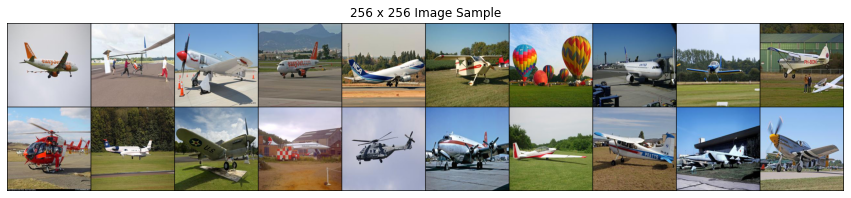

In [9]:
grid = next(iter(dataloader))

im = make_grid(grid[0], nrow=10, normalize=True)

plt.figure(figsize=(15, 14))
plt.imshow(np.transpose(im, axes=(1, 2, 0)))
plt.axis('off')
plt.title('256 x 256 Image Sample')